In [0]:
#!/usr/bin/env python3

In [0]:
from keras.layers import Dense, Input, merge, Merge, Dropout, MaxPooling2D, Flatten, Conv2D,\
AveragePooling2D, ZeroPadding2D, Lambda, Activation
import keras
from keras.datasets import mnist
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import optimizers
from keras.layers.core import Dense,Flatten,Dropout,Activation
from keras.models import Model,Sequential
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras import backend as K

In [0]:
batch_size = 128
num_classes = 10
epochs = 2

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train.shape

(60000, 28, 28)

In [0]:
#reshaping the data

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [34]:
!pip install utils

In [0]:
%matplotlib inline
import warnings
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras import backend as K
import sklearn as sk

True Value [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


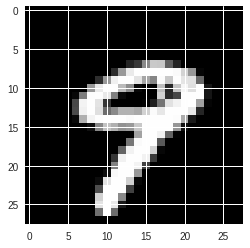

In [134]:
IMG_INDEX = 9
X = x_test
X.shape
img_plt = X[IMG_INDEX,].reshape(28,28)
img_plt.shape
plt.imshow(img_plt, cmap='gray')
print("True Value",y_test[IMG_INDEX,])

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [46]:
y_test.shape

(10000, 10)

In [0]:
#model
model = Sequential()

model.add(Conv2D(64, (5, 5,), padding='same', activation='relu', name='conv1', input_shape = input_shape ))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
model.add(Conv2D(64, (5, 5,), padding='same', activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense1'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', name='dense2'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', name='dense3'))


model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=["accuracy"])

In [54]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 258s 4ms/step - loss: 0.4031 - acc: 0.8735 - val_loss: 0.0589 - val_acc: 0.9837
Epoch 2/2
14336/60000 [======>.......................] - ETA: 3:07 - loss: 0.1299 - acc: 0.9664

60000/60000 [==============================] - 259s 4ms/step - loss: 0.1154 - acc: 0.9700 - val_loss: 0.0399 - val_acc: 0.9874
Test loss: 0.039884803180730705
Test accuracy: 0.9874


In [0]:
#checking model.evaluate and model.predict_classes accuracy values
pred = model.predict_classes(x_test)

In [93]:
#From binary class to class vector
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from numpy import argmax
test = np.argmax(y_test,axis=1) #column axis 
print(test)


[7 2 1 ... 4 5 6]


In [94]:
print("Accuracy:", accuracy_score(test,pred))

Accuracy: 0.9874


true value: 0


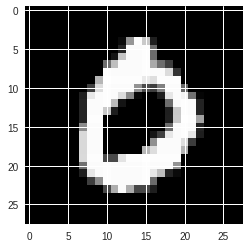

In [61]:
plt.imshow(x_test[3,].reshape(28,28), cmap='gray')
print("true value:",pred[3])

In [102]:
#finding and printing incorrect ones 
incorrects = np.nonzero(pred != test)
print(incorrects)

(array([ 259,  290,  321,  445,  449,  582,  619,  684,  716,  717,  726,
        740,  924,  947,  965, 1014, 1039, 1062, 1182, 1226, 1232, 1247,
       1299, 1319, 1326, 1500, 1527, 1559, 1569, 1681, 1709, 1754, 1878,
       1901, 1955, 1982, 2016, 2018, 2035, 2043, 2109, 2118, 2129, 2130,
       2135, 2182, 2293, 2387, 2447, 2454, 2582, 2597, 2654, 2810, 2896,
       2995, 3030, 3060, 3062, 3073, 3157, 3206, 3422, 3503, 3520, 3558,
       3597, 3727, 3767, 3778, 3808, 3853, 3869, 3906, 4065, 4078, 4163,
       4176, 4207, 4224, 4238, 4256, 4265, 4284, 4306, 4497, 4536, 4547,
       4571, 4575, 4639, 4761, 4807, 4823, 4838, 4860, 4874, 4956, 5734,
       5937, 5955, 5997, 6091, 6505, 6571, 6572, 6576, 6597, 6651, 6847,
       8094, 8325, 8408, 8520, 9009, 9015, 9019, 9280, 9530, 9642, 9679,
       9692, 9729, 9856, 9888, 9892]),)


true value: 0
true value: 7


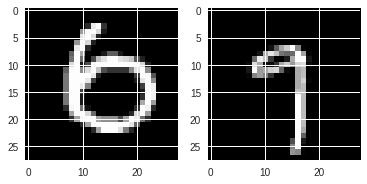

In [123]:
plt.subplot(1,2,1)
plt.imshow(x_test[259,].reshape(28,28), cmap='gray')
print("true value:",pred[259])

plt.subplot(1,2,2)
plt.imshow(x_test[4224,].reshape(28,28), cmap='gray')
print("true value:",pred[4224])
